### 문제 정의
- 500 명의 성별, 키, 몸무게, 비만도(정답)를 이용해서 비만 정도를 판단하는 모델을 만들어보자


In [5]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

NameError: name 'bmi' is not defined

In [6]:
bmi = pd.read_csv('./data/bmi_500.csv', index_col = 'Label')
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [7]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 데이터 전처리

In [18]:
# 결측치 확인
# info()   ====== 데이터 프레임에 간략한 정보를 제공
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


- 결측치가 없다! - 학습용 데이터라 데이터가 깔끔하다
- 전처리 pass

### 탐색적 데이터 분석

In [19]:
# 기술 통계치를 확인 
bmi.describe()

#데이터 프레임에 수치형과 문자형 데이터가 같이 있을때는 수치형 데이터만 통계치 출력

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [20]:
# 정답에 해당하는 인덱스 부분의 고유값을 살펴보자
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

- 'Obesity' : 비만
- 'Nomal'   : 보통
- 'Overweight' : 과체중
- 'Extreme Obesity' : 고도 비만
- 'Weak' : 저체중
- 'Extremely Weak' : 심각한저체중

In [23]:
# 키와 몸무게 데이터를 산점도로 표시하는 함수를 만들어서 구분을 해보자

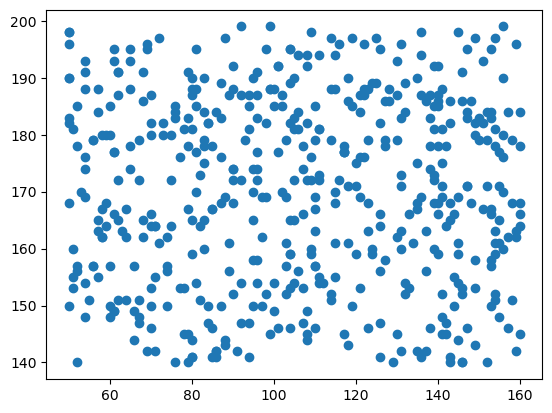

In [24]:
# scatter() : 산점도를 그려주는 함수
plt.scatter(bmi['Weight'], bmi['Height'])

In [25]:
def myScatter(index, color) : 
    tmp = bmi.loc[index]
    plt.scatter(tmp['Weight'],tmp['Height'],
                c = color, 
               label = index
               )

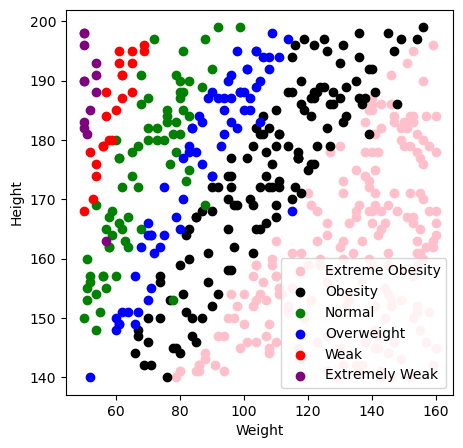

In [32]:
# 그래프를 그려보자
plt.figure(figsize=(5,5)) # 전체 그래프의 가로, 세로 크기 설정


myScatter('Extreme Obesity', 'pink')
myScatter('Obesity', 'black')
myScatter('Normal', 'green')
myScatter('Overweight', 'blue')
myScatter('Weak', 'red')
myScatter('Extremely Weak', 'purple')

plt.legend() # 범례
plt.xlabel('Weight') # x축의 이름
plt.ylabel('Height')
plt.show()

- 몸무게와 키에 따른 데이터 분포를 직관적으로 확인해 볼 수 있었다.

### 모델링(모델 선택, 학습, 평가)
- 1. 문제와 정답으로 분리
- 2. 학습 데이터와 평가 데이터로 분리
- 3. 모델 생성 및 하이퍼 파라미터 조정
- 4. 학습 및 평가

In [34]:
# 데이터 로드
data = pd.read_csv('./data/bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [36]:
# 문제와 정답을 분리해보자
X = data.loc[ : ,'Height':'Weight']
y = data['Label']

In [37]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [74]:
# 학습, 평가 데이터 분리(train 350 :  test 150)
X_train = X.iloc[ : 350, : ]
X_test = X.iloc[ 350 : , : ]
y_train = y[:350]
y_test = y[350 : ]


In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [76]:
# 모델 import
# knn 모델을 불러오자
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=10)

In [78]:
# 모델 학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [79]:
# 모델 예측
pre = knn_model.predict(X_test)
pre

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [80]:
# 모델 평가
knn_model.score(X_test, y_test)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.94

In [81]:
# 학습된 모델에 내 키와 몸무게를 넣어 확인해보기.
knn_model.predict([[173, 64]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Normal'], dtype=object)

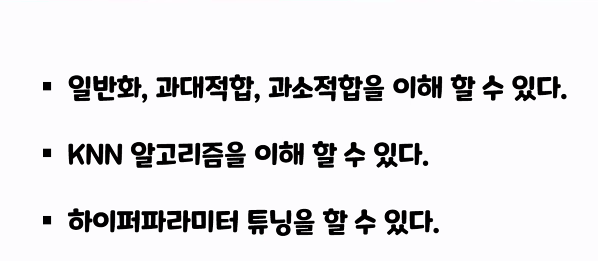

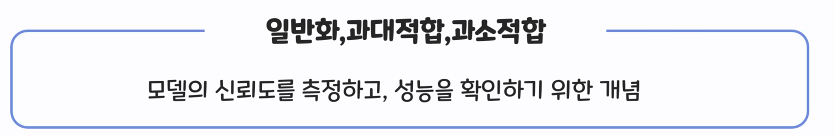

과대 적합  = 축구공을 학습   -> 농구공은 공이 아니다  
과소 적합  = 동그란건 공이야 -> 동그란건 모두 공이다

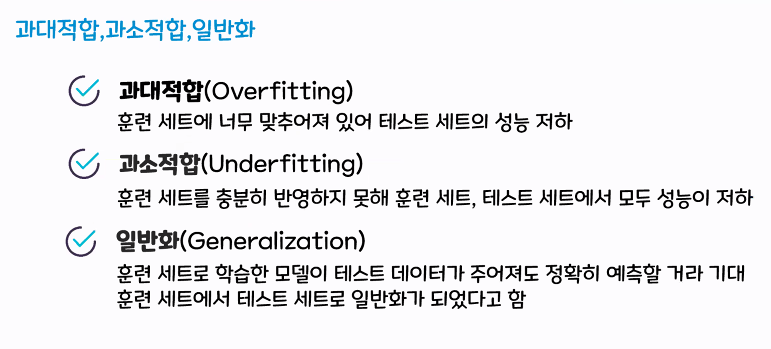

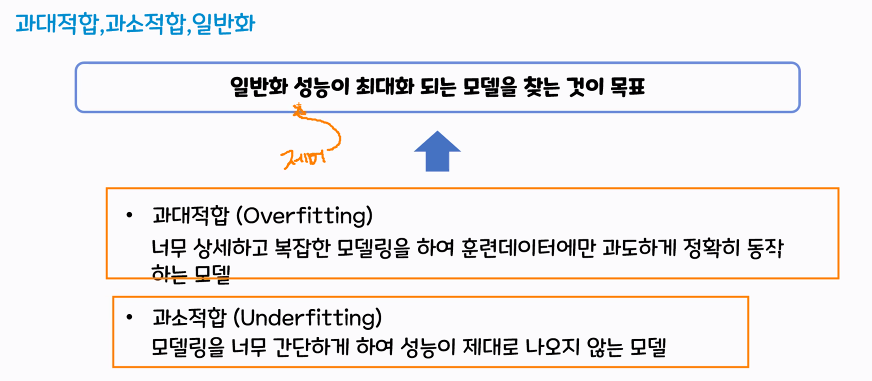

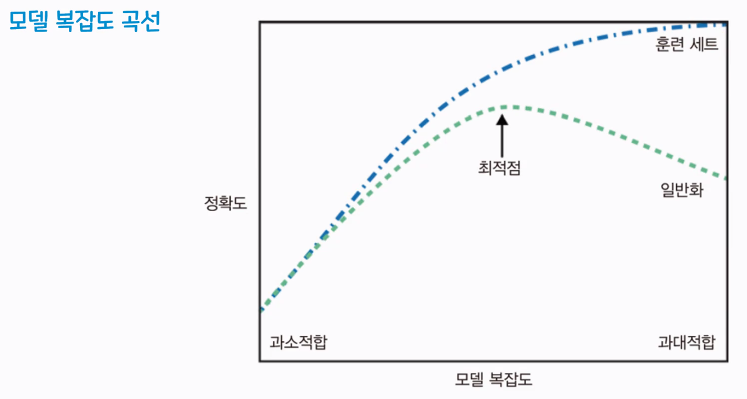

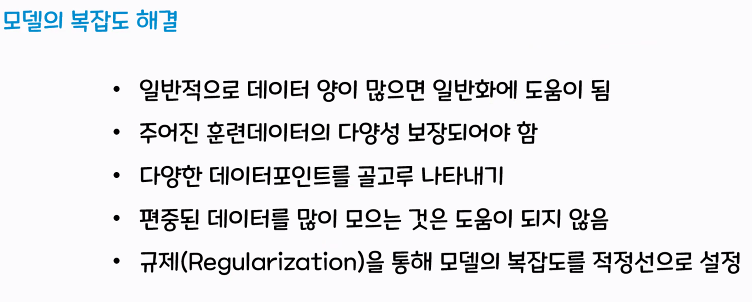

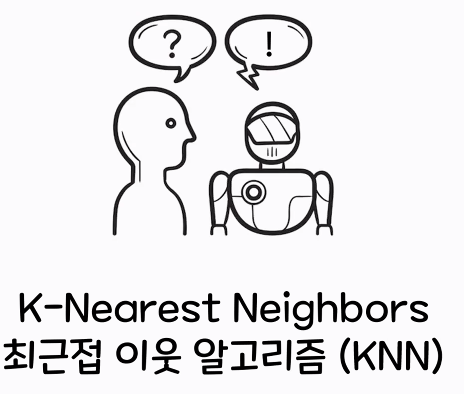

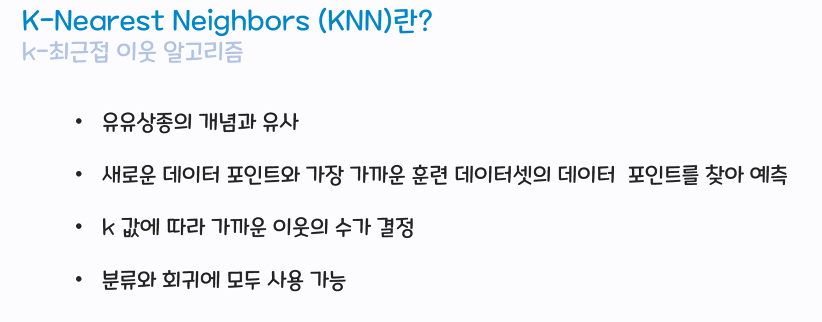
분류와 회귀 둘다 쓰는 장점


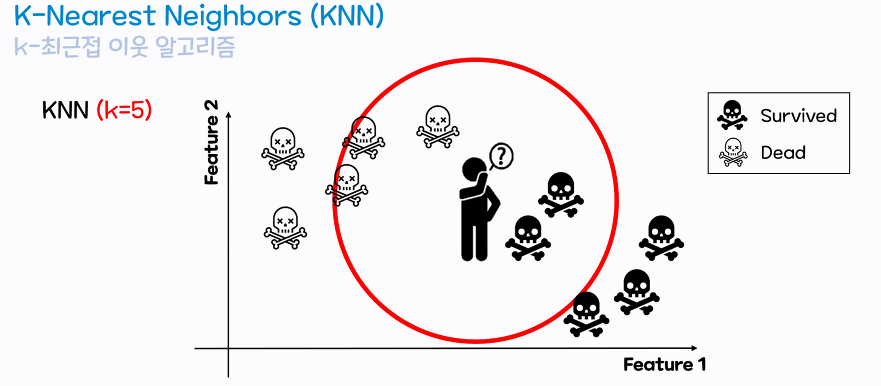

k=3 이면 Survived  
k=5 이면 Dead

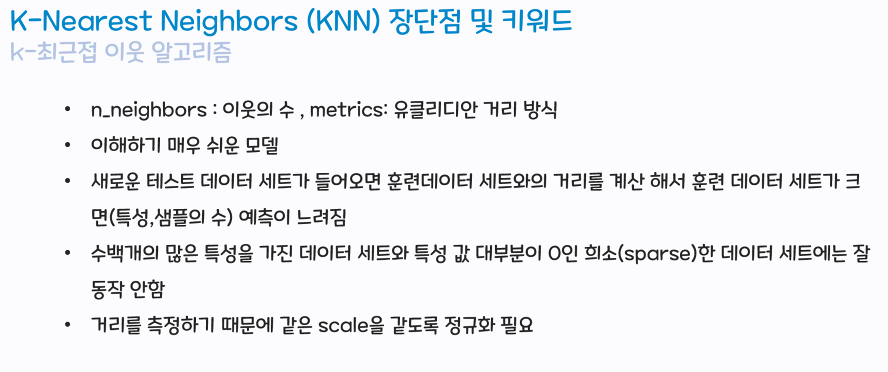